In [30]:

pip install --upgrade seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.0 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.0 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
from ydata_profiling import ProfileReport
import ipywidgets

/var/folders/fs/tjddsjl56hz4qgqkl9pt5h000000gn/T/ipykernel_79727/3031226110.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Load the Dataset

In [3]:
df = pd.read_csv("/Users/debdeepsanyal/Downloads/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#finding the shape of the dataset
df.shape

(1000, 8)

the _shape_ of the dataset tells us that we have the data for a **1000** students

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


the _info_ provides us with the information that the dataset has **no null values** for any of the columns 

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


this confirms yet once again that there are no null values in the dataset

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

aside from having no null values, we also have no **_duplicated_** values in our dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


we gain a few valuable information from the statistics -
- **_reading score_** has the highest average among all the  3 subjects, while **_maths_** has the lowest

- the marks in **_writing score_** vary the most among the 3 subjects

- only **25%** of the people in maths scored above *77 marks*

- on an average, *50%* of the students have scored in the range of _**60-80 marks**_ in all the 3 subjects 

In [10]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
for col in columns :
    print(df[col].value_counts().to_frame())

        count
gender       
female    518
male      482
                count
race/ethnicity       
group C           319
group D           262
group B           190
group E           140
group A            89
                             count
parental level of education       
some college                   226
associate's degree             222
high school                    196
some high school               179
bachelor's degree              118
master's degree                 59
              count
lunch              
standard        645
free/reduced    355


### Observations made from above statistics

- **_51.8%_** of the students in the dataset are *females*, **_48.2%_** of the population being male

- *group C* has the highest representation among all other groups, making up  **_31.9%_** of the total population

- only **_5.9%_** of the parents have a master's degree, while most claim to have passed some college 

In [11]:
profile = ProfileReport(df, title = 'Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
sns.countplot(data = df, x = df['gender'].astype('category'))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('GenderCount')
plt.show()

Lets have a look at the average scores by _Gender_

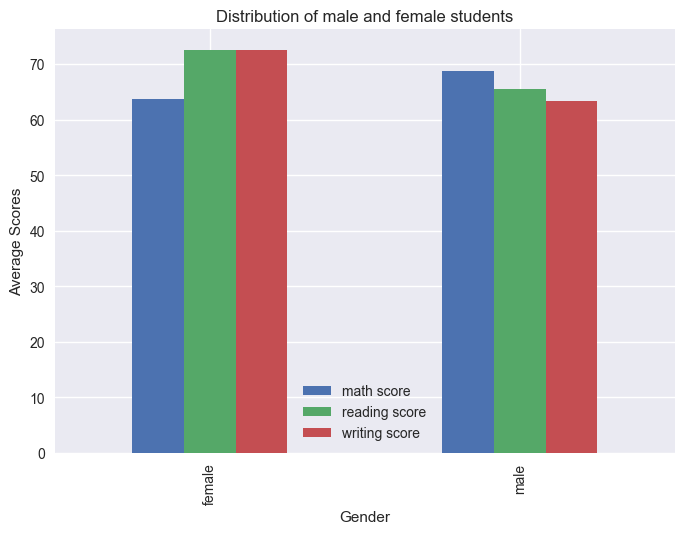

In [7]:
scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
scores.plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Average Scores')
plt.title('Distribution of male and female students')
plt.show()

From the above plot, we can conclude that -

- males have a *higher* score in **_maths_** than females do

- females have a _higher_ score in **_reading_** and **_writing_** than males do

- while females are equally potent in **_reading_** in **_writing_**, the data shows that males tend to fetch *lower* marks in **_writing_** than **_reading_**

In [13]:
plt.pie(df['race/ethnicity'].value_counts().values, autopct = '%1.1f%%', labels = df['race/ethnicity'].value_counts().index)
plt.axis('equal')
plt.title('Group Distribution')
plt.show()

**_Group C_** represents majority of the population while **_Group A_** is the under representitive group

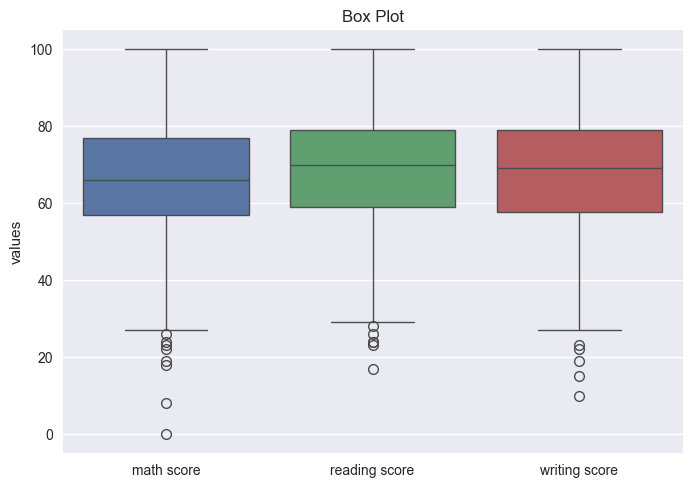

In [4]:
sns.boxplot(data = df[['math score', 'reading score', 'writing score']])
#plt.xlabel('score')
plt.ylabel('values')
plt.title("Box Plot")
plt.show()

A few observations that can be made from the boxplot of the data -

- Half the students have scored *less than* 70 in **maths**

- *math* has the **lowest** 50th percentile score among all the 3 subjects, indicating that students tend to fetch lower marks in maths 

   It can also mean that *math* might the hardest subject among the 3

- *reading score* has the **highest** 50th percentile among all 3 subjects, indicating that students tend to perform better when it comes to reading

   It can also mean that *reading* might the easiest subject among the 3

- Only **25%** students in reading and writing have been able to score more than 80 marks 

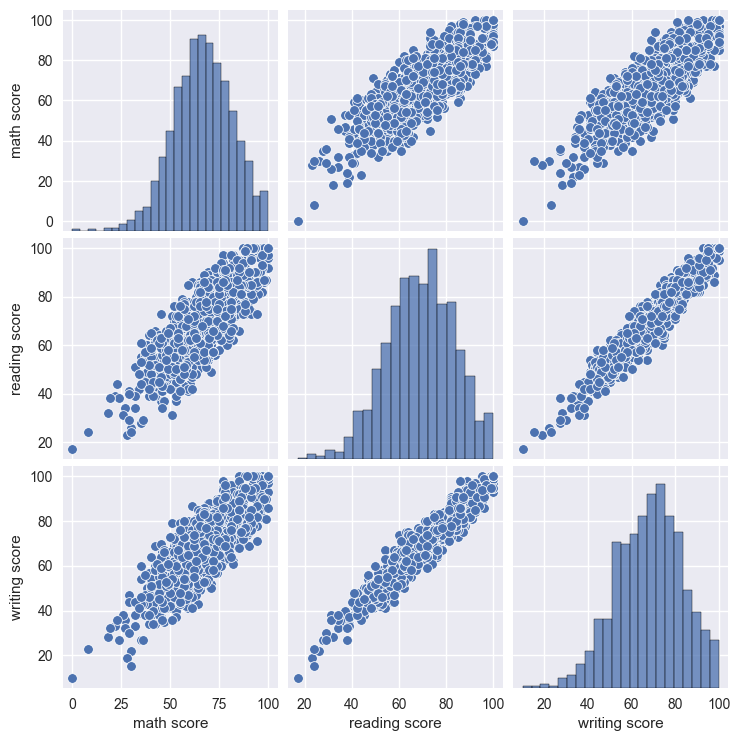

In [5]:
sns.pairplot(df)


While all the subjects share a fairly linear relationship with each other, **reading and writing score** are more linear in shape as compared to others

Text(0.5, 1.0, 'Distribution of reading score')

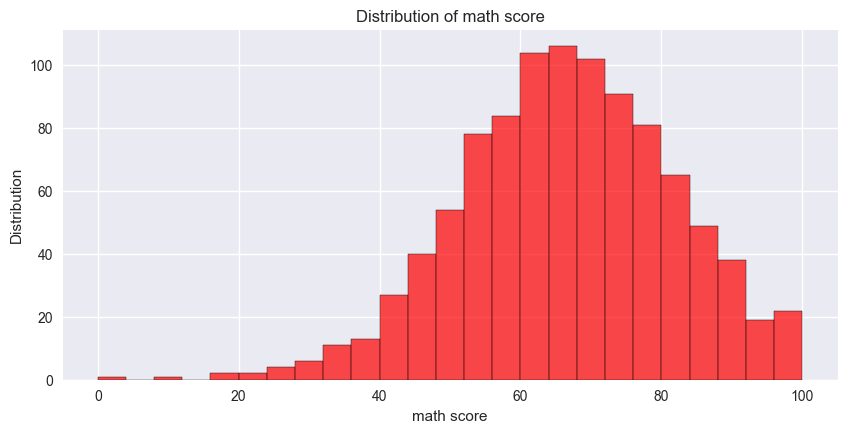

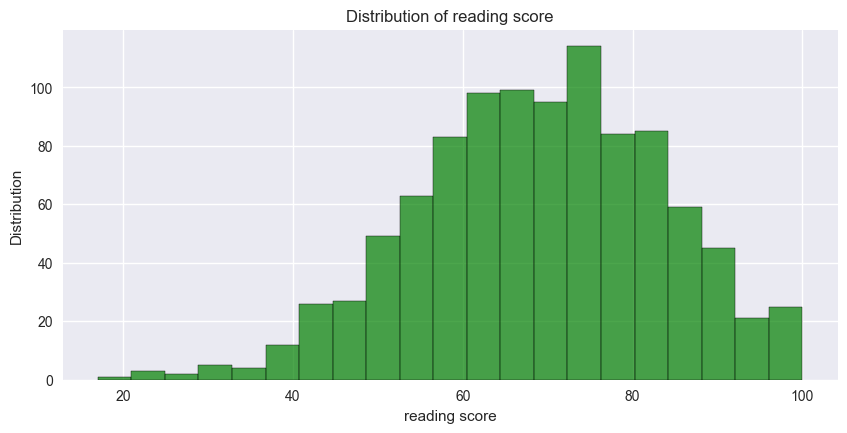

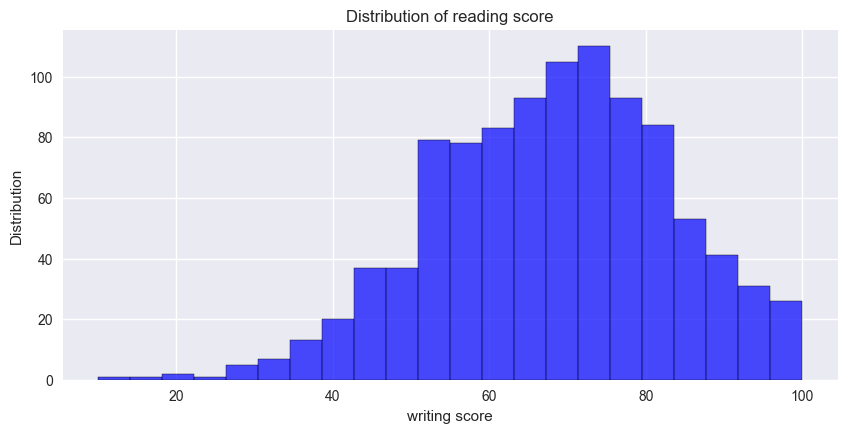

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.histplot(data = df, x = df['math score'], alpha = 0.7, color = 'red')
plt.xlabel('math score')
plt.ylabel('Distribution')
plt.title("Distribution of math score")

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
sns.histplot(data = df, x = df['reading score'], alpha = 0.7, color = 'green')
plt.xlabel('reading score')
plt.ylabel('Distribution')
plt.title("Distribution of reading score")

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.histplot(data = df, x = df['writing score'], alpha = 0.7, color = 'blue')
plt.xlabel('writing score')
plt.ylabel('Distribution')
plt.title("Distribution of reading score")

Observations made from the histograms -

- Maximum number of students have scored *100* in **_writing score_**

- **_maths_** has the largest tail towards the left indicating that the least marks among all 3 subjects has been scored in *maths* 

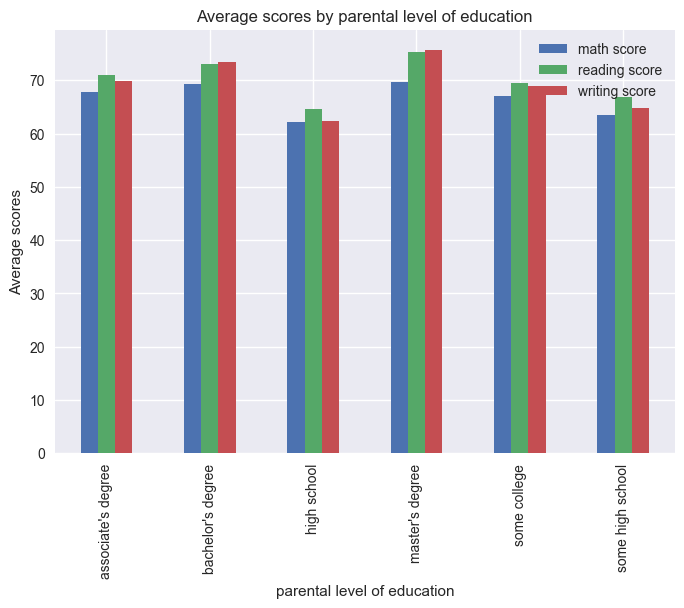

In [7]:
parent = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
parent.plot(kind='bar')
plt.xlabel('parental level of education')
plt.ylabel('Average scores')
plt.title('Average scores by parental level of education')
plt.show()

We get to see that the students having more educated parents tend to perform better and achieve a higher average than the students having parents who have completed lower levels of education.

Children of parents who have completed the **master's degree** have achieved the highest overall average marks in all the subjects, while children of the parents claiming to have passed only the **high school** have the lowest overall average across all three subjects  

Children of parents having completed the **master's** and the **bachelor's** degree tend to be more proficient in writing than reading

Students having parents belonging to **some high school** have a *greater average marks* than the ones whose parents have claimed to have completed **high school**, that makes an interesting point to note

Overall, its evident that the average marks achieved by students has a direct relationship with the education level of their parents. Parents who have completed higher studies tend to encourage their children to focus more on studies, hence its important for parents to be adequately educated as well 

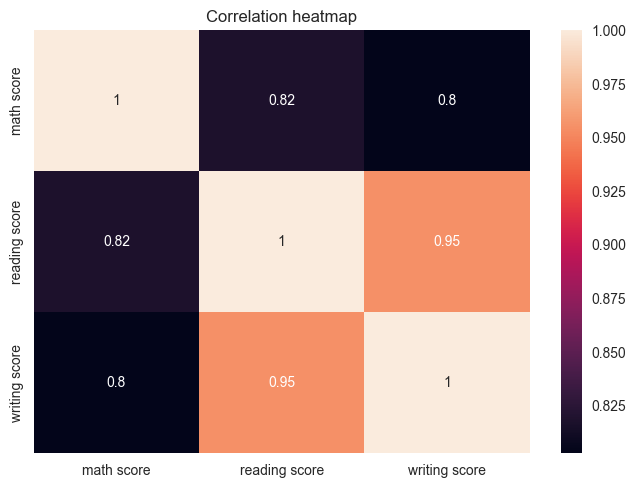

In [8]:
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()

sns.heatmap(corr, annot=True)
plt.title('Correlation heatmap')
plt.show()

While maths seem to have no relationship with other subjects, the scores of reading and writing score appear to have a strong correlation. Which means that that students to write well tend to read well and vice versa.